**Leçon : étude de quelques algorithmes populaires**

# [SVM](https://scikit-learn.org/stable/modules/svm.html#support-vector-machines)

## Définition simplifiée (intuition)

Les *Séparateurs à Vaste Marge* ou *Support Vector Machine* sont une classe d'algorithmes assez populaires, utilisés dans des tâches de **classification**, **régression** et **détection d'outliers**.


## SVM pour la classification

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), 
[NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC), 
[LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

In [8]:
from sklearn import svm
svc_model = svm.SVC()
nscv_model = svm.NuSVC()
lsvc_model = svm.LinearSVC()

### Principe de fonctionnement des SVM : Recherche de l'hyperplan optimal

Les SVM fonctionnent:
- en recherchant un hyperplan qui sépare les différentes régions de l'espace des données (indiqué par les lignes pleines ci-dessous). 
- L'hyperplan sélectionné est celui qui maximise l'écart entre lui-même et les points les plus proches de chaque classe, appelés les *marges* (indiquées par les lignes pointillées ci-dessous).
- Support Vectors : Ce sont les points les plus proches de l'hyperplan et qui déterminent la position de l'hyperplan


![SVM](https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png)

### Optimisation

l'optmisation fait appel à des mathématiques plus commpliquées, les plus féru de maths peuvent en avoir un apercu sur la [page dédiée de scikit-learn](https://scikit-learn.org/stable/modules/svm.html#svc) ou [ce chapitre de cours dédié sur OpenClassroom](https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507841-maximisez-la-marge-de-separation-entre-vos-classes)

### SVM avec noyaux (Kernels)

Les SVMs peuvent être utilisées avec différentes [fonction noyaux](https://en.wikipedia.org/wiki/Kernel_method), les *kernels*.   
Ces kernels permettent d'adapter le comportement des SVMs à des variables qui présenteraient des relations linéaires (en utilisant par ex des kernels linéaires) ou non linéaires (en utilisant par ex des kernels RBF ou crées manuellement)

Les **Support Vector Machines (SVM)** utilisent des noyaux pour transformer les données d'entrée dans un espace de plus grande dimension, où il est plus facile de trouver un hyperplan séparateur linéaire

Un **noyau** est une fonction qui permet de calculer le produit scalaire entre les vecteurs de données dans un espace de caractéristiques transformé, sans avoir besoin d'effectuer explicitement la transformation. Cette technique est appelée le **"trick du noyau"**.

####  Types de noyaux dans les SVM

 **Noyau linéaire (Linear Kernel)**
   - Le noyau linéaire est le plus simple et est utilisé lorsque les données sont déjà linéairement séparables dans l'espace des caractéristiques d'origine.
   - Formellement, il est défini comme :
   
     $$
     K(x_i, x_j) = x_i^T x_j
     $$
     où $ x_i $ et $ x_j $ sont deux vecteurs d'entrée.


In [14]:
 from sklearn import svm
model = svm.SVC(kernel='linear', C=1)
#model.fit(X_train, y_train)

 **Noyau RBF (Radial Basis Function)**
   - Le noyau RBF est l'un des noyaux non linéaires les plus courants. Il est très efficace pour des problèmes où les données ne sont pas linéairement séparables. Il est basé sur la distance entre les points, ce qui le rend sensible aux points proches.
   - Formellement, il est défini comme :
     $$
     K(x_i, x_j) = \exp\left(-\frac{{\| x_i - x_j \|^2}}{{2\sigma^2}}\right)
     $$
     
     
     
     où $\sigma \$ est un paramètre qui contrôle la largeur de la fonction gaussienne.




In [13]:
 from sklearn import svm
model = svm.SVC(kernel='rbf', C=1, gamma='scale')
#model.fit(X_train, y_train)

 **Noyau Polynomial**
   - Le noyau polynomial est utilisé lorsque les données peuvent être séparées par un polynôme. Ce noyau permet de modéliser des relations polynomiales entre les données.
   - Formellement, il est défini comme :
     $$
     K(x_i, x_j) = (x_i^T x_j + c)^d
     $$
     où $c $ est un paramètre d'ajustement et $ d $ est le degré du polynôme.


In [10]:
from sklearn import svm
model = svm.SVC(kernel='poly', C=1, degree=3, coef0=1)
#model.fit(X_train, y_train)


 **Noyau Sigmoïde**
   - Le noyau sigmoïde est basé sur la fonction d'activation sigmoïde, utilisée dans les réseaux de neurones. Ce noyau est moins courant que les autres noyaux, mais il peut être utile dans certains cas spécifiques.
   - Formellement, il est défini comme :
     $$
     K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c)
     $$
     où $\alpha $ et $ c $ sont des paramètres ajustables.

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='sigmoid', C=1, gamma='scale')
#model.fit(X_train, y_train)

**Choix de noyau**

Le choix du noyau dépend des caractéristiques de vos données :
- Si vos données sont linéairement séparables, utilisez le **noyau linéaire**.
- Si vos données ne sont pas linéairement séparables, commencez par essayer le **noyau RBF**, qui est souvent un bon choix par défaut.
- Si vous soupçonnez que la relation entre les données est polynomiale, essayez le **noyau polynomial**.
- Le **noyau sigmoïde** peut être utile dans des situations spécifiques, mais il est moins couramment utilisé.



### Les paramètres de modèle SVM

##### Paramètre C

C est le paramètre ayant le plus d'impact sur l'apprentissage, et ses variations imposent une forme de régularisation:
Dans scikit-learn, la valeur par défaut est fixée à 1, **le diminuer** correspond à ajouter **plus de régularisation**

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) Peut-être utilisé pour trouver la valeur optimale de c.

### Exemple

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Chargement et préparation des données
data = sns.load_dataset('iris')

X = data.drop('species', axis=1)  
y = data['species'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Création et entrainement de modèle avec un paramètre C=0.01**

In [3]:
svm = SVC(kernel='linear', C=0.01)  

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

score = svm.score(X_test, y_test)
print(f"Score du modèle SVM sur l'ensemble de test : {score:.4f}")

print("\nRapport de classification sur l'ensemble de test :")
print(classification_report(y_test, y_pred))


Score du modèle SVM sur l'ensemble de test : 0.8667

Rapport de classification sur l'ensemble de test :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.54      0.70        13
   virginica       0.68      1.00      0.81        13

    accuracy                           0.87        45
   macro avg       0.89      0.85      0.84        45
weighted avg       0.91      0.87      0.86        45



**Optimisation de C**

In [4]:
from sklearn.model_selection import GridSearchCV

svm = SVC(kernel='linear')  

param_grid = {'C': [0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(svm, param_grid, cv=5) 
grid_search.fit(X_train, y_train)

print(f"Meilleur paramètre C est : {grid_search.best_params_}")
#print(f"Meilleure performance avec C : {grid_search.best_score_}")


best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

score = best_svm.score(X_test, y_test)
print(f"Score du modèle SVM sur l'ensemble de test : {score:.4f}")

print("\nRapport de classification sur l'ensemble de test :")
print(classification_report(y_test, y_pred))


Meilleur paramètre C est : {'C': 10}
Score du modèle SVM sur l'ensemble de test : 0.9778

Rapport de classification sur l'ensemble de test :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



**Le noyau optimal**

In [5]:
svm = SVC()  # Utilisation d'un noyau linéaire

params_grid = {'kernel': ['linear', 'rbf', 'poly' ], 'C': [0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(svm, params_grid, cv=5) 
grid_search.fit(X_train, y_train)

print(f"Meilleur paramètre C trouvé : {grid_search.best_params_}")
#print(f"Meilleure performance avec C : {grid_search.best_score_}")


best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

score = best_svm.score(X_test, y_test)
print(f"Score du modèle SVM sur l'ensemble de test : {score:.4f}")

print("\nRapport de classification sur l'ensemble de test :")
print(classification_report(y_test, y_pred))

Meilleur paramètre C trouvé : {'C': 10, 'kernel': 'linear'}
Score du modèle SVM sur l'ensemble de test : 0.9778

Rapport de classification sur l'ensemble de test :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## SVM pour la régression

[SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR), 
[NuSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR), 
[LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR)



## 1. Principe de base de la SVR
Contrairement à la classification, où l'objectif est de trouver une frontière de décision, la SVR vise à trouver une fonction qui modélise au mieux la relation entre les features et la target, tout en minimisant la fonction de perte suivante:

$$
L(y, f(x)) = \begin{cases} 
0 & \text{si } |y - f(x)| \leq \epsilon \\
|y - f(x)| - \epsilon & \text{sinon} 
\end{cases}
$$



- **$y$** : valeur réelle  
- **$f(x)$** : valeur prédite  
- **$\epsilon$** : seuil de tolérance

### Exemple

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


df = sns.load_dataset('tips')

X = df[['total_bill', 'size']]
y = df['tip']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svr = SVR(kernel = 'rbf')

#param_grid = {'C': [0.1, 1, 10, 100],'kernel': ['linear', 'rbf', 'poly']}
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Meilleurs paramètres :", grid_search.best_params_)


best_svr = grid_search.best_estimator_

y_pred = best_svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse:.4f}")
print(f"Score R² : {r2:.4f}")




Meilleurs paramètres : {'C': 1, 'epsilon': 0.01, 'gamma': 0.01}
Erreur quadratique moyenne (MSE) : 0.6135
Score R² : 0.5092


##  Avantages & inconvénients

*Avantages*
- C'est un algorithme efficace avec des données à hautes dimensions
- Il reste efficace lorsque le nombre de dimensions $p$ est supérieur au nombre d'observations $n$
- Sa consommation en mémoire est efficace

- Il est versatile et peut être utilisé avec différentes(fonctions kernels)

*Incovénients*
- Leur complexité algorithmique est élevée: de $O(p*n^2)$ à $O(p*n^3)!$ en fonction du kernel --> Peu utilisable pour du Big Data !
- les SVMs ne fournissent pas nativement une probabilité des estimations obtenues, elle sont calculées empiriquement par d'autres méthodes (souvent par validation croisée)

# [Les arbres de décision](https://scikit-learn.org/1.5/modules/tree.html)

## Définition

Un arbre de décision est un modèle d'apprentissage supervisé utilisé pour la classification et la régression. Il prend la forme d'une structure arborescente où chaque nœud représente un test sur une variable, chaque branche représente le résultat du test, et chaque feuille représente une prédiction ou une classe.

-------------------

Les arbres de décision sont des algorithmes simples qui partitionnent les données en clusters homogènes (les feuilles) en fixant des conditions sur les variables du jeu de données.

L'algorithme utilise une logique itérative issue des arbres, dans laquelle, à chaque nœud, les données sont partitionnées selon la condition fixée, jusqu'à obtenir des clusters homogènes, appelés nœuds terminaux ou feuilles.

La croissance de l'arbre peut être limitée par un certain nombre de paramètres : on souhaite obtenir, dans chaque feuille, des clusters aussi homogènes et éloignés que possible les uns des autres. 

Les arbres de décision peuvent être utilisé à la fois pour des taches de :
- **classification** ([DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html#classification)):  

- **régression** ([DecisionTreeRegressor](https://scikit-learn.org/stable/modules/tree.html#regression)):  


**Exemple**

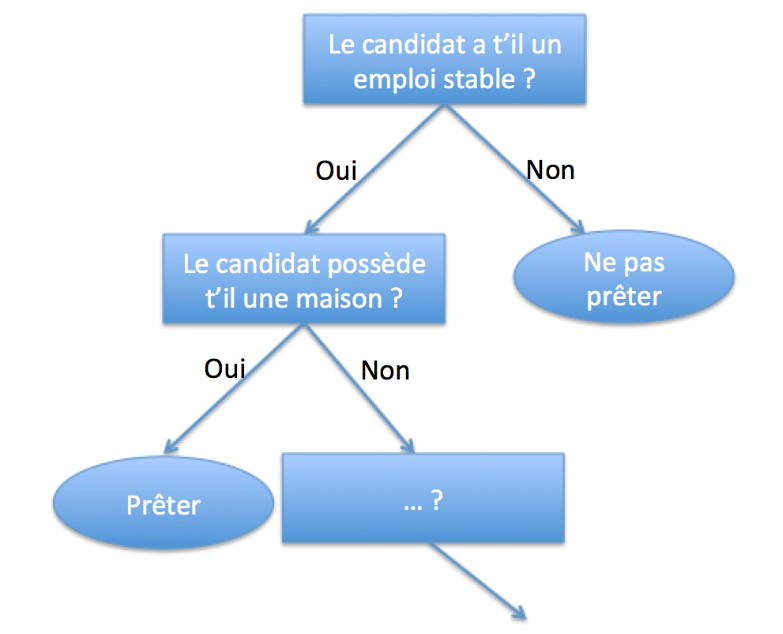

**Terminologie des arbres de décision**

- Nœud racine : Premier nœud de l'arbre.
- Nœuds internes : Points de décision.
- Feuilles : Prédictions finales.
- Profondeur de l'arbre : Nombre de niveaux dans l'arbre

## AD pour la classification

[DecisionTreeClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

 **Critères de Séparation**

###  **Entropie et Gain d'Information (ID3, C4.5) :**
   - **Entropie :** Mesure de la pureté d'un nœud. Plus l'entropie est faible, plus les données sont homogènes.
   
   $$
   \text{Entropie}(S) = - \sum_{i=1}^{n} p_i \log_2(p_i)
   $$
   où $p_i$ est la proportion d'observations dans la classe $i$.


###  **Indice de Gini (CART) :**
   - **Indice de Gini :** Mesure la probabilité qu'une observation soit mal classée si elle est classée au hasard.

   $$
   \text{Gini}(S) = 1 - \sum_{i=1}^{n} p_i^2
   $$
   où $p_i$ est la proportion d'observations dans la classe $i$.
   
   L'objectif de l'algorithme CART est de choisir la variable et le point de coupure qui minimisent l'indice de Gini dans les sous-ensembles créés par le split.


**Exemple**

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt


iris = load_iris()
X, y = iris.data, iris.target

model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X, y)

y_pred = model.predict(X)

print(f'F1 score: {f1_score(y, y_pred, average="macro"):.4f}')
#print(f'Précision : {accuracy_score(y, y_pred):.4f}')
#print('Matrice de confusion :')
#print(confusion_matrix(y, y_pred))
#print('Rapport de classification :')
#print(classification_report(y, y_pred))


F1 score: 0.9733


**Visualisation de l'arbre**

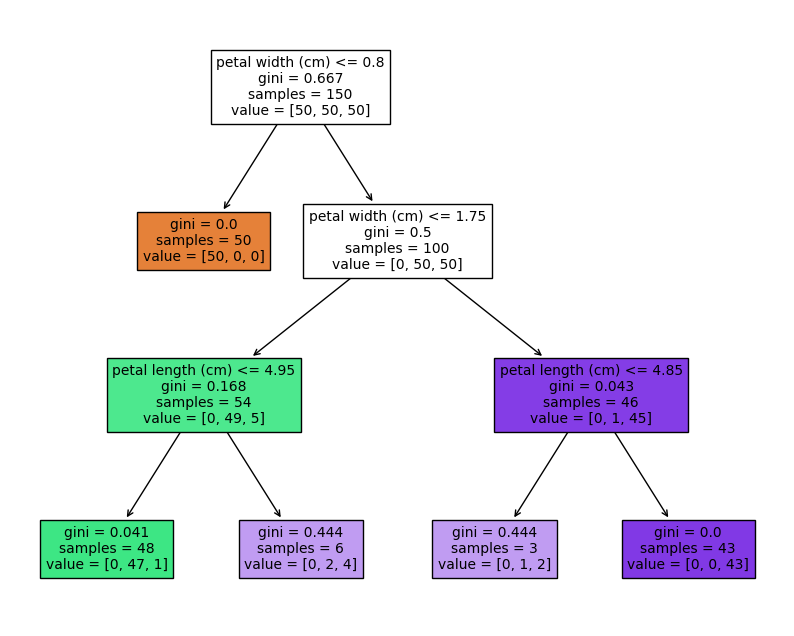

In [12]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(model, filled=True, feature_names=iris.feature_names)
plt.show()

## AD pour la régression

[DecisionTreeRegressor](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

En régression, on cherche à minimiser l'erreur quadratique moyenne (MSE) au niveau de chaque nœud.


$$
\text{Var}(S) = \frac{1}{|S|} \sum_{i=1}^{|S|} (y_i - \bar{y})^2
$$


Où :
- $ y_i $ est la valeur de la cible pour l'observation \( i \),
- $ \bar{y}$ est la moyenne des valeurs de la cible dans le sous-ensemble \( S \).


**Exemple**

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

diamonds = sns.load_dataset('diamonds')

X = diamonds[['carat', 'cut']]
y = diamonds['price']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")


Erreur quadratique moyenne (MSE) : 1959209.68


## Avantages & Inconvénients

*Avantages*
- Les arbres de décision sont simples à visualiser, comprendre et interpréter
- Ils acceptent des données numériques et catégorielles (non géré dans sklearn)
- Ils requièrent très peu de préparation de données
- La complexité algorithmique pour la prediction est logarithmique en nombre de points: $O(log(n)$
- Ils peuvent être utilisé pour des problèmes à plusieurs output
- Ils utilisent un modèle *white box* et sont très interprétable
- Ils est possible d'utiliser nativement des tests statistiques pour évaluer la fiabiliter du modèle
 
*Inconvénients*
- Ils ont une forte tendeance à sur apprendre en créant des arbres trop complexes qui ne généraliseront pas bien avec de nouvelles données
- Les résultats peuvent être instables: une petite variation dans les données peut provoquer des résultats différents
- Les algorithmes utilisés pour leur implémentations ne garantissent généralement pas de trouver un minimum global
- Certains concepts seront difficile à faire apprendre par un abre de décision, comme le XOR ou la parité
- Leur prédictions peuvent être fortement biaisées en faveur de la classe dominante lorsque les classes présentes dans dataset sont déséquilibrées